## <center>회귀분석 2 HW05</center>

**<p style="text-align:right;font-size:15px">202014107 <br> 통계학과 <br> 강신성</p>**

### 편의추정량

In [272]:
library(car)
library(glmnet)
par(family = "NanumGothic")
setwd("~/R/regression analysis/data/")
options(repr.plot.width = 16, repr.plot.height = 9)

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">  1. "hipcenter.csv" 데이터는 다음의 변수로 이루어져 있다.</p>**

* $\text{Age : Age in years}$
* $\text{Weight : Weight in lbs}$
* $\text{HtShoes : Height in shoes in cm}$
* $\text{Ht : Height bare foot in cm}$
* $\text{Seated : Seated height in cm}$
* $\text{Arm : lower arm length in cm}$
* $\text{Thigh : Thigh length in cm}$
* $\text{Leg : Lower leg length in cm}$
* $\text{hipcenter : horizontal distance of the midpoint of the hips from a fixed location in the car in mm}$

In [14]:
hipcenter = read.csv("hipcenter.csv")
head(hipcenter)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
2,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
3,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
4,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
5,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230
6,47,170,178.7,177.0,92.4,36.0,43.2,37.4,-185.150


&nbsp;&nbsp;&nbsp; **"hipcenter"를 예측하기 위한 모형을 적합하려고 한다. 다음 물음에 답하여라.**

**<p style="padding-left:30px;text-indent:-15px">(1) 변수들 사이의 산점도행렬을 그리고 설명하여라.</p>**

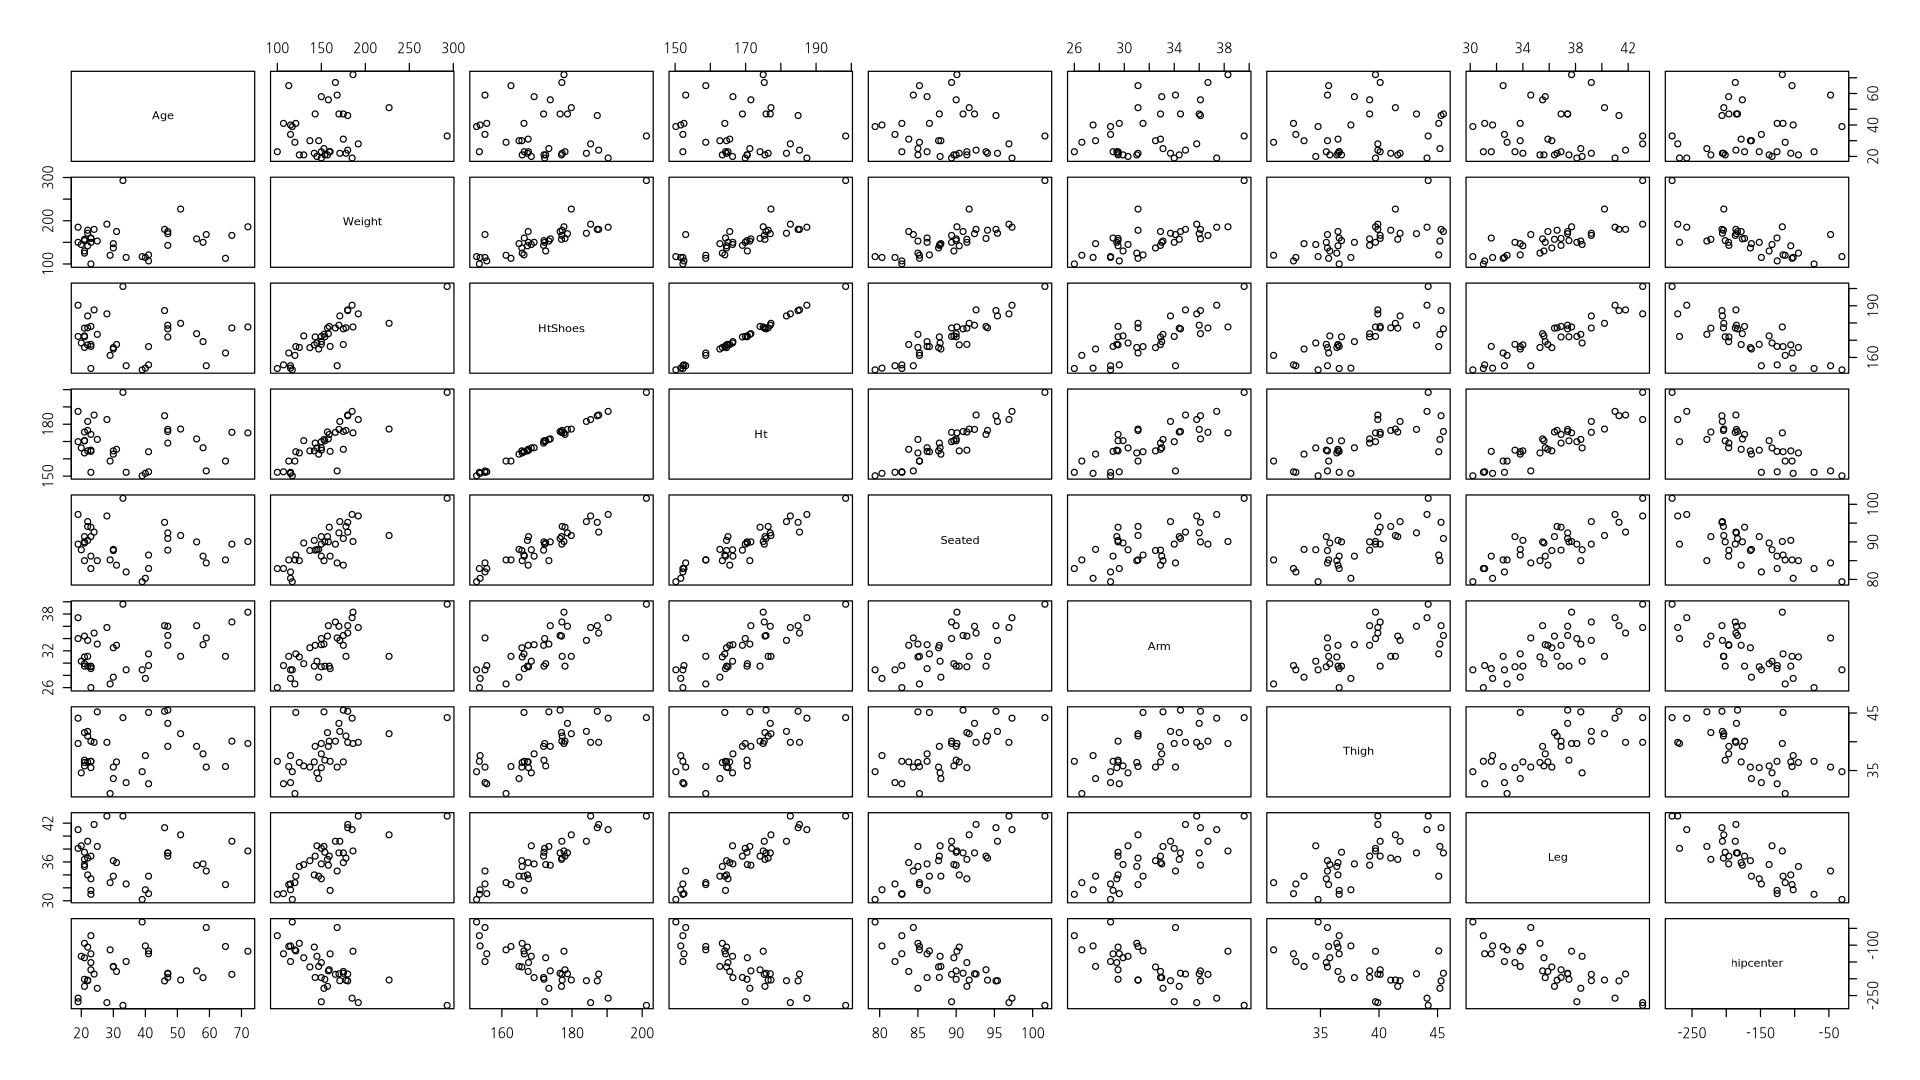

In [5]:
pairs(hipcenter)

> `Age`를 제외하고는 거의 모든 변수들이 상관성이 존재하는 것으로 보인다. 이는 변수값들이 신체의 치수에 대한 정보라는 특성상 발생하는 현상으로 여겨진다.
> 
> 또한 `HtShoes`와 `Ht`는 거의 직선의 산점도가 그려지므로 완전에 가까운 다중공선성이 발생할 것이라 예상할 수 있다. 두 변수는 각각 신발 사이즈와 발의 사이즈를 나타내는 변수이므로 실제로도 가장 유사한 정보를 가지고 있으리라 예상된다.

**<p style="padding-left:30px;text-indent:-15px">(2) 변수들 사이의 상관계수를 구하여라. (소수점 둘째자리까지 반올림) 다중공선성이 존재한다고 할 수 있는가?</p>**

In [8]:
cor(hipcenter) |> round(2)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.00,0.08,-0.08,-0.09,-0.17,0.36,0.09,-0.04,0.21
Weight,0.08,1.00,0.83,0.83,0.78,0.70,0.57,0.78,-0.64
HtShoes,-0.08,0.83,1.00,1.00,0.93,0.75,0.72,0.91,-0.80
Ht,-0.09,0.83,1.00,1.00,0.93,0.75,0.73,0.91,-0.80
Seated,-0.17,0.78,0.93,0.93,1.00,0.63,0.61,0.81,-0.73
Arm,0.36,0.70,0.75,0.75,0.63,1.00,0.67,0.75,-0.59
Thigh,0.09,0.57,0.72,0.73,0.61,0.67,1.00,0.65,-0.59
Leg,-0.04,0.78,0.91,0.91,0.81,0.75,0.65,1.00,-0.79
hipcenter,0.21,-0.64,-0.80,-0.80,-0.73,-0.59,-0.59,-0.79,1.00


In [9]:
cor(hipcenter$HtShoes, hipcenter$Ht)

[1] 0.9981475

> 설명변수 간 상관계수의 절대값이 높은 변수들이 많이 관찰된다. 특히 변수 `HtShoes`와 `Ht` 간 상관계수가 거의 1에 가까울 정도로 상당히 높다. 따라서 다중공선성이 존재한다고 말할 수 있다.

**<p style="padding-left:30px;text-indent:-15px">(3) 선형회귀모형을 적합하여라. (계수를 추정, 예 : $\hat y = 3 + 2x$ 이렇게 적어주기)</p>**

`-` 가용한 설명변수를 모두 사용하여 선형회귀모형을 적합

In [11]:
hip_model = lm(hipcenter~., data = hipcenter)
summary(hip_model)


Call:
lm(formula = hipcenter ~ ., data = hipcenter)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.827 -22.833  -3.678  25.017  62.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 436.43213  166.57162   2.620   0.0138 *
Age           0.77572    0.57033   1.360   0.1843  
Weight        0.02631    0.33097   0.080   0.9372  
HtShoes      -2.69241    9.75304  -0.276   0.7845  
Ht            0.60134   10.12987   0.059   0.9531  
Seated        0.53375    3.76189   0.142   0.8882  
Arm          -1.32807    3.90020  -0.341   0.7359  
Thigh        -1.14312    2.66002  -0.430   0.6706  
Leg          -6.43905    4.71386  -1.366   0.1824  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.72 on 29 degrees of freedom
Multiple R-squared:  0.6866,	Adjusted R-squared:  0.6001 
F-statistic:  7.94 on 8 and 29 DF,  p-value: 1.306e-05


`-` 사용된 설명변수들을 순서대로 $x_1, x_2, \cdots, x_8$이라 할 때, 적합된 회귀모형

$$\hat y = 436.432 + 0.776 x_1 + 0.026 x_2 - 2.692 x_3 + 0.601 x_4 + 0.534 x_5 - 1.328 x_6 - 1.143 x_7 - 6.439 x_8$$

**<p style="padding-left:30px;text-indent:-15px">(4) 위의 선형회귀모형에서 개별 회귀계수의 유의성 검정 결과와 (1), (2)번 결과와 연관지어 설명하여라.</p>**

In [12]:
summary(hip_model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),436.43212823,166.5716187,2.62008697,0.01384361
Age,0.77571620,0.5703288,1.36012113,0.18427175
Weight,0.02631308,0.3309704,0.07950283,0.93717877
HtShoes,-2.69240774,9.7530351,-0.27605845,0.78446097
Ht,0.60134458,10.1298739,0.05936348,0.95306980
Seated,0.53375170,3.7618942,0.14188376,0.88815293
Arm,-1.32806864,3.9001969,-0.34051323,0.73592450
Thigh,-1.14311888,2.6600237,-0.42974011,0.67056106
Leg,-6.43904627,4.7138601,-1.36598163,0.18244531


p-value를 통하여 개별 회귀계수의 유의성을 검정한 결과, 절편을 제외한 회귀계수들은 유의수준 $\alpha = 0.05$에서 통계적으로 유의하지 않았다. 설명변수 간 다중공선성이 존재하여 모형 자체는 유의할 수 있지만, 개별 회귀계수들은 유의하지 않는 상황이 발생한 것이다.

**<p style="padding-left:30px;text-indent:-15px">(5) `car` 패키지의 `vif` 함수를 이용하여 각 설명변수의 `vif` 값을 구하여라. 다중공선성이 존재한다고 할 수 있는가?</p>**

In [15]:
vif(hip_model)

Age     Weight    HtShoes         Ht     Seated        Arm      Thigh 
  1.997931   3.647030 307.429378 333.137832   8.951054   4.496368   2.762886 
       Leg 
  6.694291

In [18]:
vif(hip_model)[3:4]

HtShoes       Ht 
307.4294 333.1378

> 분산팽창지수가 10 이상이면 다중공선성이 존재한다고 판단하는데, `HtShoes`와 `Ht`의 vif는 300이 넘을 정도로 상당히 크다. 따라서 다중공선성이 존재한다.

**<p style="padding-left:30px;text-indent:-15px">(5) `glmnet` 함수를 이용하여 능형회귀모형을 적합하고자 한다.</p>**

**<p style="padding-left:50px;text-indent:-15px">(a) $\lambda$의 값에 따라 회귀계수가 변하는지 그림으로 보여라. (이 때, $0 < \lambda < 100$으로 설정)</p>**

In [157]:
X = as.matrix(hipcenter[-9])
y = hipcenter$hipcenter

In [158]:
ridge_model = glmnet(X, y, alpha = 0, lambda = seq(0.01, 100, 0.1))

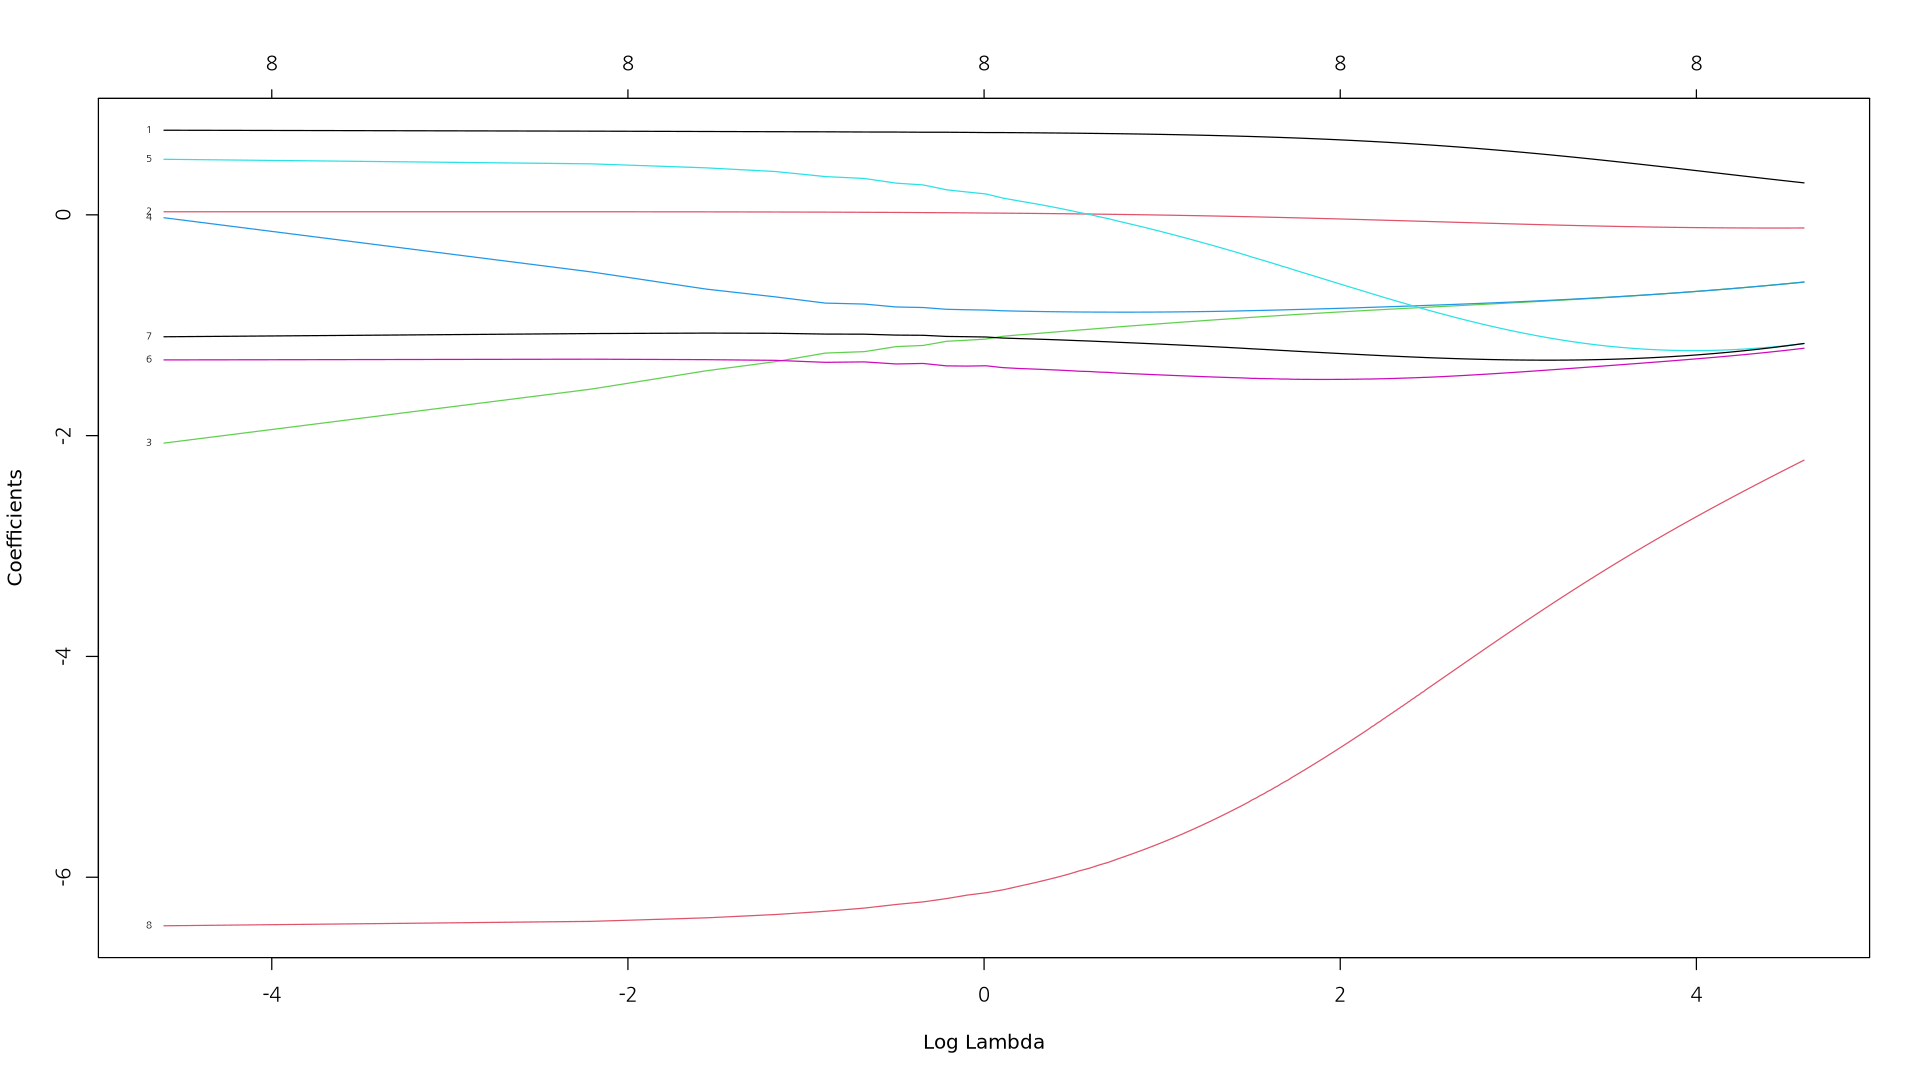

In [159]:
plot(ridge_model, label = TRUE, xvar = "lambda")

**<p style="padding-left:50px;text-indent:-15px">(b) 교차검증을 수행하였을 때, $\text{MSE}$를 가장 작게 하는 $\lambda$는 무엇인가?</p>**

`-` 하나 빼기 교차검증(LOOCV) 결과

In [160]:
cv_fit1 = cv.glmnet(X, y, alpha = 0, nfolds = nrow(X))
cv_fit1

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”



Call:  cv.glmnet(x = X, y = y, nfolds = nrow(X), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  36.41    78    1442 315.7       8
1se 213.24    59    1750 411.7       8

In [161]:
cv_fit1$lambda.min

[1] 36.40799

> LOOCV 결과, $\text{PRESS}(\lambda)$를 가장 작게 하는 $\lambda$는 $36.408$이다.

`-` `k = 10`으로 설정한 k-fold CV 결과

In [182]:
cv_fit10 = cv.glmnet(X, y, alpha = 0, nfolds = 10)
cv_fit10


Call:  cv.glmnet(x = X, y = y, nfolds = 10, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min  33.17    79    1416 221.5       8
1se 146.98    63    1608 366.0       8

In [183]:
cv_fit10$lambda.min

[1] 33.1736

> 교차검증 결과 $\text{MSE}$를 가장 작게 하는 $\lambda$는 $33.174$이다.

**<p style="padding-left:50px;text-indent:-15px">(c) 위의 $\lambda$에 대한 능형회귀 추정량은 무엇인가?</p>**

`-` LOOCV 결과 $\lambda = 36.408$에 대한 능형회귀모형

In [185]:
ridge_tuned = glmnet(X, y, alpha = 0, lambda = cv_fit1$lambda.min)
coef(ridge_tuned)

9 x 1 sparse Matrix of class "dgCMatrix"
                     s0
(Intercept) 400.3627167
Age           0.4739906
Weight       -0.1058193
HtShoes      -0.7389606
Ht           -0.7384387
Seated       -1.2039750
Arm          -1.3560685
Thigh        -1.3041906
Leg          -3.1102470

$$\hat y = 400.363 + 0.474 x_1 - 0.106 x_2 - 0.739 x_3 - 0.738 x_4 - 1.204 x_5 - 1.356 x_6 - 1.304 x_7 - 3.110 x_8$$

**<p style="font-size:15px;text-indent:-15px;padding-left:15px"> 2. 살인사건에 대한 사형선고 여부와 인종 사이의 관계를 알아보기 위하여 미국의 한 주의 2000년 이후 해당 케이스들에 대하여, $y = $ 살인사건으로 기소된 사람에 대한 사형선고 여부($1 = $ 예, $0 = $ 아니오)를 반응변수로 하고, 피고인($D$)과 피해자($V$)의 인종($1 = $ 흑인, $0 = $ 백인)을 설명변수로 하는 로지스틱 회귀모형을 적합하였다. 적합에 의하여 추정된 추정식이 $$\widehat{\text{logit}\big(p(x)\big)} = \log\frac{\widehat{P(y = 1 | x)}}{1 - \widehat{P(y = 1|x)}} = -2.06 + 0.87 D - 2.40 V$$ 라 한다. 다음은 예측식에 기초한 참과 거짓에 대한 질문이다. 참인지 거짓인지 판단하라. (풀이과정 기재)</p>**

**<p style="padding-left:30px;text-indent:-15px">(1) 사형선고에 대한 추정확률은 피고인이 백인이고 피해자가 흑인일 때 가장 낮다.</p>**

> **참**
>
>  피고인이 백인이면 $D = 0$이고, 피해자가 흑인이면 $V = 1$이다.  $D$에 대한 회귀계수는 양수이고, $V$에 대한 회귀계수는 음수이므로, 이 경우가 가장 확률이 낮게 된다.

**<p style="padding-left:30px;text-indent:-15px">(2) 피해자의 인종이 주어져 있을 때, 백인 피고인이 사형선고를 받을 오즈의 추정값은 흑인 피고인의 오즈의 $0.87$배이다. 만약 백인 피고인일 경우 $D = 1$이고, 흑인일 경우 $D = 0$이면 $D$의 회귀계수의 추정값은 $0.87$이 아니라 $1/0.87 = 1.15$가 되었을 것이다.</p>**

> **거짓**
>
> 지수의 $D$의 회귀계수 추정량 제곱은 $D = 1$인 그룹의 오즈를 분모로 하는 $D = 1$과 $D = 0$ 그룹 간 오즈비를 의미한다. 즉, 백인 피고인이 사형선고를 받을 오즈의 추정값은 흑인 피고인의 오즈의 $e^{-0.87} = 0.42$배가 되어야 한다.
>
> 또한 계수가 양수여서 흑인 피고인의 경우 사형선고를 받을 확률이 더 크기 때문에, 백인 피고인이 $D = 1$이고, 흑인 피고인이 $D = 0$이 된다고 하면 회귀계수의 추정값은 음수가 되어야 한다. 그런 의미에서 회귀계수의 추정값은 $-0.87$이 되어야 할 것이다.

**<p style="padding-left:30px;text-indent:-15px">(3) 절편의 추정값 $-2.06$은 피고인과 피해자가 백인일 경우 $D = V = 0$에 사형선고에 대한 추정확률이다.</p>**

> **거짓**
>
> 로지스틱 회귀모형에서 로짓은 확률값이 아니다. 추정확률은 별도의 계산이 필요하다.

In [198]:
## 추정확률
exp(-2.06)/(1+exp(-2.06))

[1] 0.1130458

**<p style="padding-left:30px;text-indent:-15px">(4) 만약, 백인피해자와 피고인이 $500$명일 때, 사형선고를 받는 사람에 대해 모형에서 적합된 도수(즉, 추정되는 기대도수)는 $500 e^{-2.06}/(1 + e^{-2.06})$과 같다.</p>**

> **거짓**
>
> 절단값이 $0.5$라면, 모형은 $500$명 모두 사형선고하지 않는 것으로 적합할 것이다. 절단값이 0.11보다 작다면, 모형은 $500$명 모두 사형선고하는 것으로 적합할 것이다.

**<p style="font-size:15px;text-indent:-15px;padding-left:15px"> 3. 재정적 및 사업적 어려움을 겪고 있는 기관을 감지하는 것은 감사 및 통제의 중요한 기능이다. 체계적인 감사 및 통제 실패는 1980년대 미국의 저축 및 대출 위기와 같은 심각한 결과를 초래하였다. "Bankrupt.csv"는 2년 후 파산(bankrupt after 2 years)한 33개의 회사와 같은 기간 동안 지급 능력을 유지(solvent after 2 years)한 33개의 회사의 일부 운영 재무 비율에 대한 데이터이다. 변수는 다음과 같다.</p>**

* $X_1 = \frac{\text{Retained Earnings}}{\text{Total Asset}} = \frac{\text{유보이익}}{\text{총자산}}$
* $X_2 = \frac{\text{Earnings Before Interest and Taxes}}{\text{Total Asset}} = \frac{\text{이자 및 세전 총 수익}}{\text{총자산}}$
* $X_3 = \frac{\text{Sales}}{\text{Total Asset}} = \frac{\text{매출액}}{\text{총자산}}$
* $Y = 1 ~ \text{if bankrupt after 2 years,}~ Y = 0 ~ \text{if solvent after 2 years}$

In [200]:
bankrupt = read.csv("Bankrupt.csv")
head(bankrupt)

,Y,X1,X2,X3
,<int>,<dbl>,<dbl>,<dbl>
1,0,-62.8,-89.5,1.7
2,0,3.3,-3.5,1.1
3,0,-120.8,-103.2,2.5
4,0,-18.1,-28.8,1.1
5,0,-3.8,-50.6,0.9
6,0,-61.2,-56.2,1.7


&nbsp;&nbsp;&nbsp; **다음 물음에 답하여라.**

**<p style="padding-left:30px;text-indent:-15px">(1) $X_1$을 설명변수로 하는 로지스틱 회귀모형을 적합하여라. (적합결과를 강의록 13p에 있는 것처럼 정리하여라.)</p>**

`-` 로지스틱 회귀계수 추정값

In [230]:
bank_model = glm(Y~X1, data = bankrupt, family = binomial)
summary(bank_model)$coef

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.1665873,0.81640372,-1.428934,0.153023103
X1,0.1767191,0.05710298,3.094745,0.001969824


$$\hat P(Y = 1 | x_1) = \frac{e^{-1.167 + 0.177 x_1}}{1 + e^{-1.167 + 0.177 x_1}}$$

**<p style="padding-left:30px;text-indent:-15px">(2) 위에서 구한 $X_1$에 대한 회귀계수는 유의한가?</p>**

> Z 검정에 따른 p-value가 유의수준 $\alpha = 0.05$에서 통계적으로 유의하므로, $X_1$에 대한 회귀계수는 유의하다.

In [248]:
summary(bank_model)$coef[2,4] <= 0.05

[1] TRUE

**<p style="padding-left:30px;text-indent:-15px">(3) 위 회귀계수에 대한 $95\%$ 신뢰구간을 구하여라.</p>**

In [236]:
suppressWarnings(confint(bank_model, level = 0.95))  ## 오버플로우 경고

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-3.20353760,0.2024125
X1,0.09349378,0.3306902


In [233]:
summary(bank_model)$coef[2,1] + qnorm(0.975)*summary(bank_model)$coef[2,2]
summary(bank_model)$coef[2,1] - qnorm(0.975)*summary(bank_model)$coef[2,2]

[1] 0.2886389

[1] 0.06479935

> 모형에서 수치적으로 구한 신뢰구간은 $(0.09349, 0.33069)$이다.
>
> 표준오차를 통해 구한 신뢰구간은 $(0.06480, 0.28864)$이다.

**<p style="padding-left:30px;text-indent:-15px">(4) 위 회귀계수의 의미를 설명하여라.</p>**

$\text{odds}_1 =  \frac{\hat P(Y = 1 ~ | ~ x_1 = x + 1)}{1-\hat P(Y = 1 ~ | ~ x_1 = x + 1)} = e^{-1.167 + 0.177 (x + 1)}$

$\text{odds}_2 =  \frac{\hat P(Y = 1 ~ | ~ x_1 = x)}{1-\hat P(Y = 1 ~ | ~ x_1 = x)} = e^{-1.167 + 0.177 x}$

$\Rightarrow \frac{\text{odds}_1}{\text{odds}_2} = e^{0.177} = 1.194$

즉, $\beta_1 = 0.177$은 총자산 대비 유보이익의 크기가 1만큼 증가하였을 때, 2년 후 파산할 가능성에 대한 오즈비는 $e^{\beta_1} = 1.194$배 만큼 증가한다고 할 수 있다.

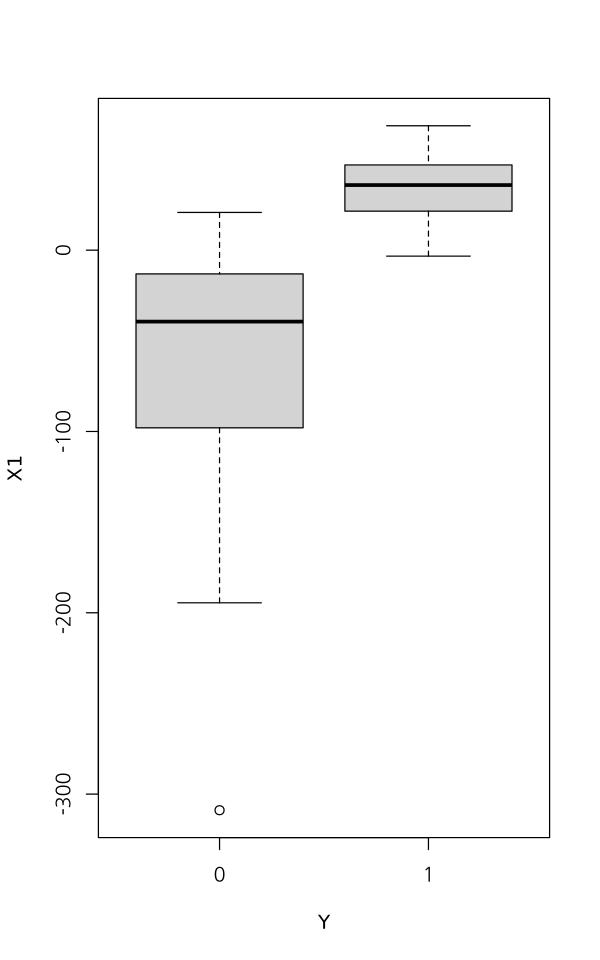

In [279]:
options(repr.plot.width = 5, repr.plot.height = 8)
boxplot(X1~Y, bankrupt)
options(repr.plot.width = 16, repr.plot.height = 9)

**<p style="padding-left:30px;text-indent:-15px">(5) 절단값을 $0.5$로 하여 분류를 하고, 그 결과를 confusion matrix로 정리하여라. 정분류율은 얼마인가?</p>**

`-` Confusion matrix

In [255]:
table(bankrupt$Y, ifelse(fitted(bank_model) > 0.5, 1, 0))

   
     0  1
  0 31  2
  1  1 32

`-` Accuracy

In [258]:
sum(diag(table(bankrupt$Y, ifelse(fitted(bank_model) > 0.5, 1, 0))))/66

[1] 0.9545455

**<p style="padding-left:30px;text-indent:-15px">(6) $X_1 = -50$인 회사가 파산할 확률을 예측하여라.</p>**

In [268]:
predict(bank_model, newdata = data.frame(X1 = -50), type = "response")
# exp(bank_model$coef[1] + bank_model$coef[2]*(-50))/(1 + exp(bank_model$coef[1] + bank_model$coef[2]*(-50)))

1 
4.528254e-05

$\widehat P(Y = 1 ~ | ~ X_1 = -50) = \frac{e^{\hat \beta_0 + \hat \beta_1 \times (-50)}}{1 + e^{\hat \beta_0 + \hat \beta_1 \times (-50)}} = 0.0000453, \text{즉, }0.00453\% $

**<p style="padding-left:30px;text-indent:-15px">(7) $X_1 = -50$인 회사가 파산을 할지 유지를 할지 분류하여라.</p>**

$\widehat P(Y = 1 ~ | ~ X_1 = -50) = 0.0000453 < 0.5 ~ \Rightarrow \hat y = 0$

> 따라서 $X_1 = -50$인 회사는 지급능력을 유지할 것이다.

**<p style="padding-left:30px;text-indent:-15px">(8) (1)번의 모형과, $X_2, X_3$을 각각 설명변수로 하는 로지스틱 회귀모형을 적합하여 $AIC$를 기준으로 했을 때 가장 좋은 모형을 선택하여라.</p>**

In [287]:
summary(bank_model)


Call:
glm(formula = Y ~ X1, family = binomial, data = bankrupt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.1666     0.8164  -1.429  0.15302   
X1            0.1767     0.0571   3.095  0.00197 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 91.495  on 65  degrees of freedom
Residual deviance: 15.803  on 64  degrees of freedom
AIC: 19.803

Number of Fisher Scoring iterations: 9


In [281]:
bank_x2 = glm(Y~X2, bankrupt, family = binomial)
summary(bank_x2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Y ~ X2, family = binomial, data = bankrupt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.18003    0.49106  -0.367 0.713903    
X2           0.20014    0.05331   3.754 0.000174 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 91.495  on 65  degrees of freedom
Residual deviance: 30.501  on 64  degrees of freedom
AIC: 34.501

Number of Fisher Scoring iterations: 8


In [282]:
bank_x3 = glm(Y~X3, bankrupt, family = binomial)
summary(bank_x3)


Call:
glm(formula = Y ~ X3, family = binomial, data = bankrupt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.7716     0.5400  -1.429    0.153
X3            0.4579     0.2927   1.564    0.118

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 91.495  on 65  degrees of freedom
Residual deviance: 88.460  on 64  degrees of freedom
AIC: 92.46

Number of Fisher Scoring iterations: 3


In [293]:
print(paste("X1이 설명변수인 모형의 AIC : ", summary(bank_model)$aic, sep = ""))
print(paste("X2가 설명변수인 모형의 AIC : ", summary(bank_x2)$aic, sep = ""))
print(paste("X3가 설명변수인 모형의 AIC : ", summary(bank_x3)$aic, sep = ""))

[1] "X1이 설명변수인 모형의 AIC : 19.8030892878859"
[1] "X2가 설명변수인 모형의 AIC : 34.50083841726"
[1] "X3가 설명변수인 모형의 AIC : 92.459552797305"


> $X_1$을 설명변수로 한 (1)번의 모형이 $\text{AIC}$가 가장 낮으므로 가장 좋은 모형으로 선택할 수 있다.